In [39]:
# Create VN
#Step 1: python -m venv myenv 
#Step 2: source myenv/bin/activate
# myenv is my virtual environment 


#pip install opencv-python
#pip install matplotlib
import matplotlib.pyplot as plt
import cv2      

In [40]:
config_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'frozen_inference_graph.pb'
model = cv2.dnn_DetectionModel(frozen_model,config_file)

In [41]:
# array to contain labels from labels txt file,
# open and read labels file and pull the lables
#takes empty lines out and splits original string read into multiple strings based on new line
classLabels = []
file_name = 'Labels.txt'
with open(file_name,'rt') as fpt:
    classLabels = fpt.read().rstrip("\n").split("\n")

In [42]:
print(classLabels)
print(len(classLabels))

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']
80


In [43]:
#based on config file settings.
model.setInputSize(320,320)
model.setInputScale(1.0/127.5) # 255/2=127.5 half of 255 8bit grb max
model.setInputMean(127.5) #mobile net takes input as [-1,1]
model.setInputSwapRB(True) # swap brb to RGB automatically

< cv2.dnn.Model 0x7f96f1ccc6b0>

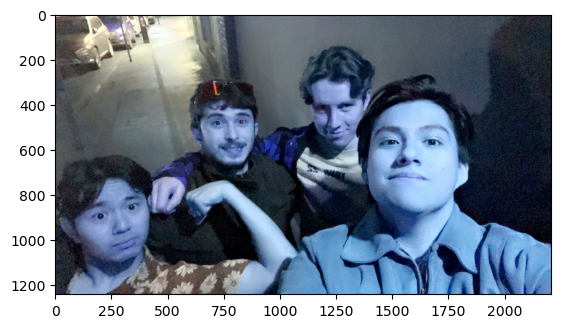

In [44]:
#Read an image 
img = cv2.imread('faces.jpeg') #DEFAULT is brg
plt.imshow(img)

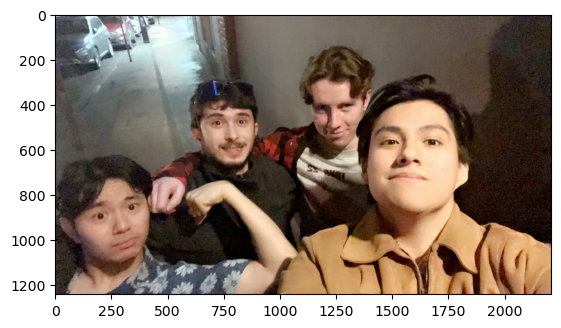

In [45]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB)) #default is somtign else covert to rgb

In [46]:
# three outputs of detect, threshold down to more arrcuracy 
ClassIndex, confidence, bbox = model.detect(img,confThreshold = 0.68)
print(ClassIndex)

[1 1 1 1]


In [47]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(),confidence.flatten(),bbox):
    cv2.rectangle(img, boxes, (255,0,0),2)
    cv2.putText(img,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40), font , fontScale=font_scale, color=(0,255,0), thickness=3)

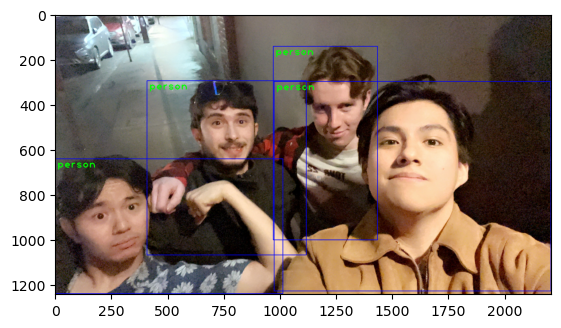

In [48]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB)) #default is somtign else covert to rgb

In [49]:
#VIDEO DEMO
#cap = cv2.VideoCapture("ENTERVIDEOFILEHERE.MP4")  below is to access webcams connected to laptop
cap = cv2.VideoCapture(1)
#Check if video is opened properly 
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannnot open video")

font_scale=3
font=cv2.FONT_HERSHEY_PLAIN

In [50]:

while True:
    ret,frame = cap.read()

    ClassIndex, confidence, bbox = model.detect(frame, confThreshold = 0.7)

    print(ClassIndex)
    if (len(ClassIndex)!= 0):
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(),confidence.flatten(), bbox):
            if(ClassInd<=80):
                cv2.rectangle(frame, boxes, (255,0,0),2)
                cv2.putText(frame, classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40), font , fontScale=font_scale, color = (0,255,0), thickness=2)

    cv2.imshow("Object Detection Justin Fuentes", frame)
    # This breaks the while loop when the user presses q
    if cv2.waitKey(1)  == ord('q'): 
         break  

()
()
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]


In [51]:
#Closes open window
cap.release()
cv2.destroyAllWindows()
for i in range (1,5):
    cv2.waitKey(1)